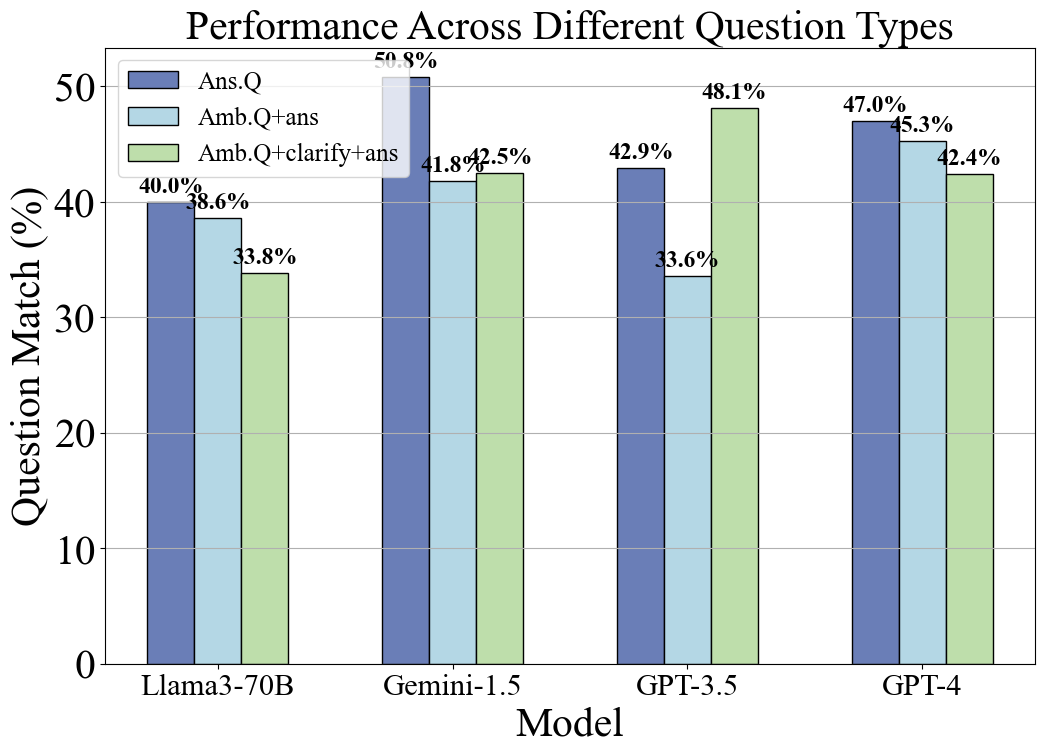

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Llama3-70B', 'Gemini-1.5', 'GPT-3.5', 'GPT-4']

# Question Match data
# Each model has three data points: Ans.Q, Amb.Q+ans, Amb.Q+clarify+ans
scores = {
    'GPT-4': [47.0, 45.3, 42.4],
    'GPT-3.5': [42.9, 33.6, 48.1],
    'Gemini-1.5': [50.8, 41.8, 42.5],
    'Llama3-70B': [40.0, 38.6, 33.8],
}

# Color scheme (cool colors for open-source models, warm colors for closed-source models)
colors = {
    'Llama3-70B': '#72C3A3',   # Cool color
    'Gemini-1.5': '#FEA040',   # Warm color
    'GPT-3.5': '#FF6100',      # Warm color
    'GPT-4': '#F28080'         # Warm color
}

# Set font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30  # Increase font size

# Plot the chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width and positions of the bars
bar_width = 0.2
index = np.arange(len(models))

# Get the data for each category
ans_q = [scores[model][0] for model in models]
amb_q_ans = [scores[model][1] for model in models]
amb_q_clarify_ans = [scores[model][2] for model in models]

# Plot the bars for each category
bars1 = ax.bar(index, ans_q, bar_width, label='Ans.Q', color='#6a7eb7', edgecolor='black')
bars2 = ax.bar(index + bar_width, amb_q_ans, bar_width, label='Amb.Q+ans', color='#b4d7e5', edgecolor='black')
bars3 = ax.bar(index + 2 * bar_width, amb_q_clarify_ans, bar_width, label='Amb.Q+clarify+ans', color='#bedeab', edgecolor='black')

# Add text above the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=17, fontweight='bold')

# Set axis labels and title
ax.set_xlabel('Model', fontsize=30)
ax.set_ylabel('Question Match (%)', fontsize=30)
ax.set_title('Performance Across Different Question Types', fontsize=30)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models, fontsize=22)
ax.legend(fontsize=18)

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Show the chart
plt.show()


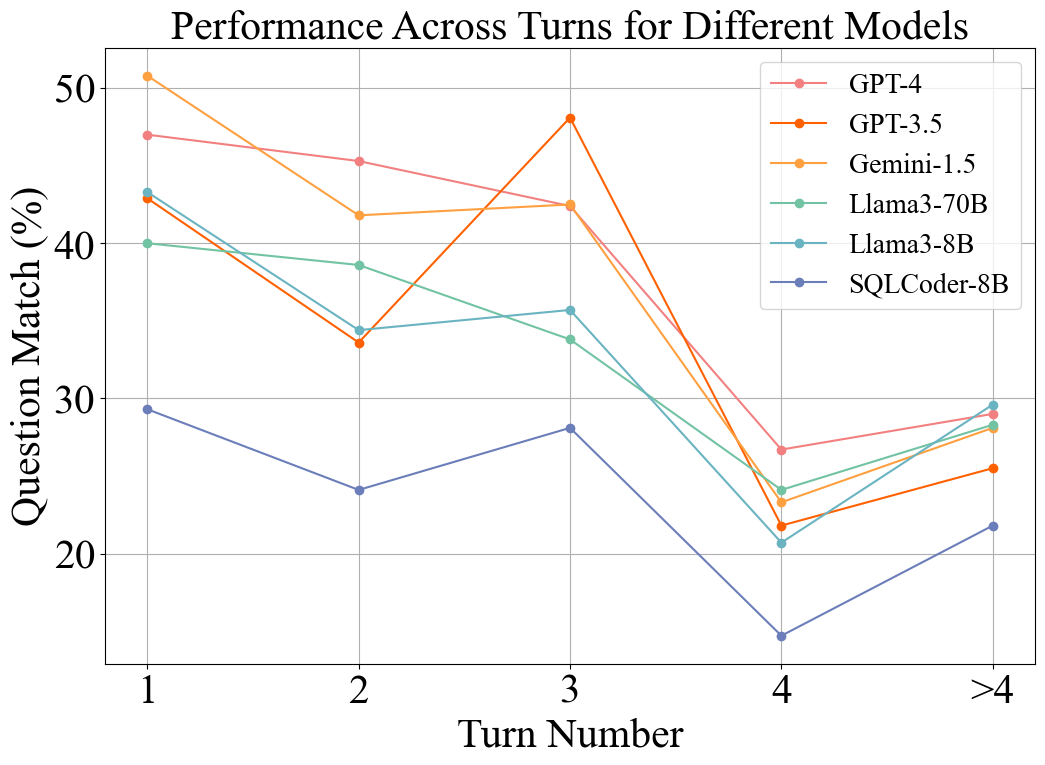

In [27]:
import matplotlib.pyplot as plt

models = ['SQLCoder-8B', 'Llama3-8B', 'Llama3-70B', 'Gemini-1.5', 'GPT-3.5', 'GPT-4']

turns = [1, 2, 3, 4,'>4']

scores = {
    'GPT-4': [47.0, 45.3, 42.4, 26.7, 29.0],
    'GPT-3.5': [42.9, 33.6, 48.1, 21.8, 25.5],
    'Gemini-1.5': [50.8, 41.8, 42.5, 23.3, 28.1],
    'Llama3-70B': [40.0, 38.6, 33.8, 24.1, 28.3],
    'Llama3-8B': [43.3, 34.4, 35.7, 20.7, 29.6],
    'SQLCoder-8B': [29.3, 24.1, 28.1, 14.7, 21.8]
}

colors = {
    'SQLCoder-8B': '#6B7EB9',  
    'Llama3-8B': '#6AB4C1', 
    'Llama3-70B': '#72C3A3', 
    'Gemini-1.5': '#FEA040',  
    'GPT-3.5': '#FF6100',      
    'GPT-4': '#F28080'       
}

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30

plt.figure(figsize=(12, 8))

for model, score in scores.items():
    plt.plot(turns, score, marker='o', label=model, color=colors[model])

plt.xlabel('Turn Number', fontsize=30)
plt.ylabel('Question Match (%)', fontsize=30)
plt.title('Performance Across Turns for Different Models', fontsize=30)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
